In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Telco_customer_churn.csv",index_col='customerID')

In [3]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Let's check for the NULL values that may be in the dataset we have to deal with

In [5]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There seems to be no NULL values.

Let's see for different features and their contributions,starting with Senior Citizens attribute

In [6]:
data['SeniorCitizen'].value_counts(normalize=True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

Let's now observe the value counts of the churn

In [7]:
data['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

So nearly 74% of the customers have not churned.
Now let's visualise the dataset for our convinience.


We will use the seaborn library for data visualisation purpose.

In [8]:
import seaborn as sns 

Let's check the data info and datatypes of every attribute.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


Something here seems to be unusual in the total charges column.The total charges which is expected to be float value instead is of object dtype.
So let's change that

In [10]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors = 'coerce')
data.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

So we have successfully changed the dtype of the total charges column to float64.
No let's check for NULL values

In [12]:
data.TotalCharges.isnull().sum()

11

We can see there are 11 NULL values in the dataset.Let's fill those up but we will need a proper value for them to fill it with.

I think a better way to fill the NULL values would be to replace it with the product of the corresponding columns of tenure and monthly charges.

In [13]:
data.TotalCharges.fillna(value = data.tenure * data.MonthlyCharges,inplace = True)

In [14]:
data.TotalCharges.isnull().sum()

0

# Correlation between numerical features

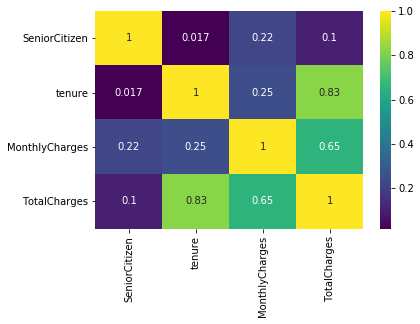

In [23]:
sns.heatmap(data.corr(),xticklabels=data.corr().columns.values,yticklabels=data.corr().columns.values,cmap='viridis',annot = True);

In [24]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


Now let's check for senior citizen attribute to see if it has any kind of effect on correlation with that of the churn values.

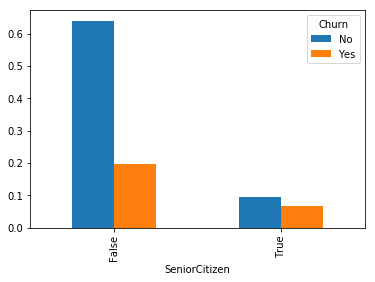

In [25]:
pd.crosstab((data.SeniorCitizen == 1),data.Churn,normalize=True).plot(kind='bar');

Let's check for contract values now

In [26]:
data.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [27]:
data['SeniorCitizen'] = data.SeniorCitizen.astype('object')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), object(17)
memory usage: 1.4+ MB

In [29]:
data.describe().round()

,tenure,MonthlyCharges,TotalCharges
count,7043.0,7043.0,7043.0
mean,32.0,65.0,2280.0
std,25.0,30.0,2267.0
min,0.0,18.0,0.0
25%,9.0,36.0,399.0
50%,29.0,70.0,1395.0
75%,55.0,90.0,3787.0
max,72.0,119.0,8685.0


Let's check for how the total charges change with that of tenure to see whether the graph leads to establish a linear relationship between them.

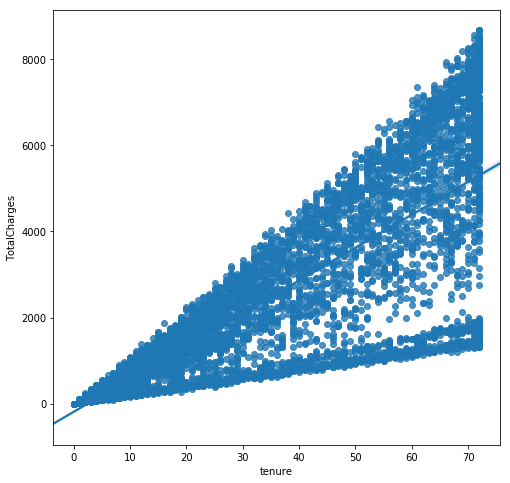

In [30]:
numerics = data[['tenure','MonthlyCharges','TotalCharges','Churn']]
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
sns.regplot(x = 'tenure',y = 'TotalCharges',data = numerics);

The data seems to follow linear relationship so may be the value of total charges do not change too much going along the increasing direction of tenure.

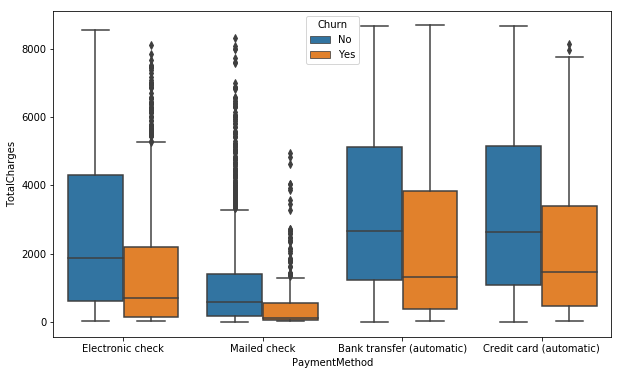

In [31]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'PaymentMethod',y = 'TotalCharges',data = data,hue = 'Churn');

We see that those who have Bank transfer as their payment method have churned out more than others.

Let's check for Partner attribute now

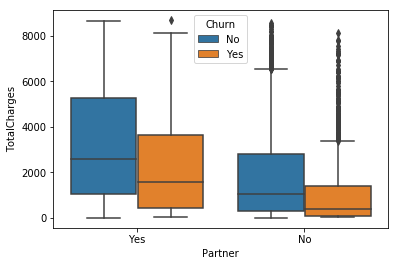

In [32]:
sns.boxplot(x = 'Partner',y = 'TotalCharges',data = data,hue = 'Churn')

we infer from this observation that customers having partners have opted to churn.

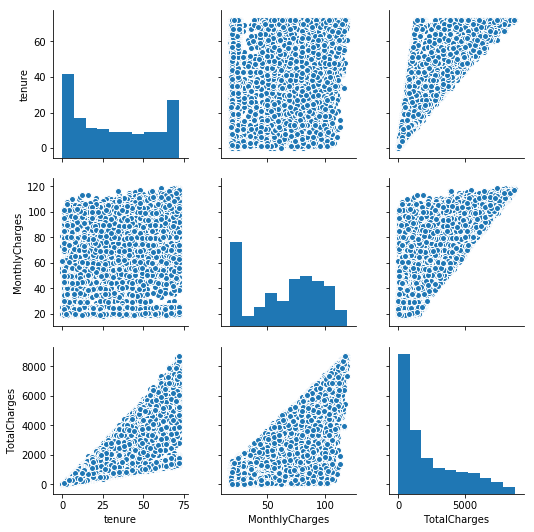

In [33]:
plt.figure(figsize = (18,16))
sns.pairplot(numerics);

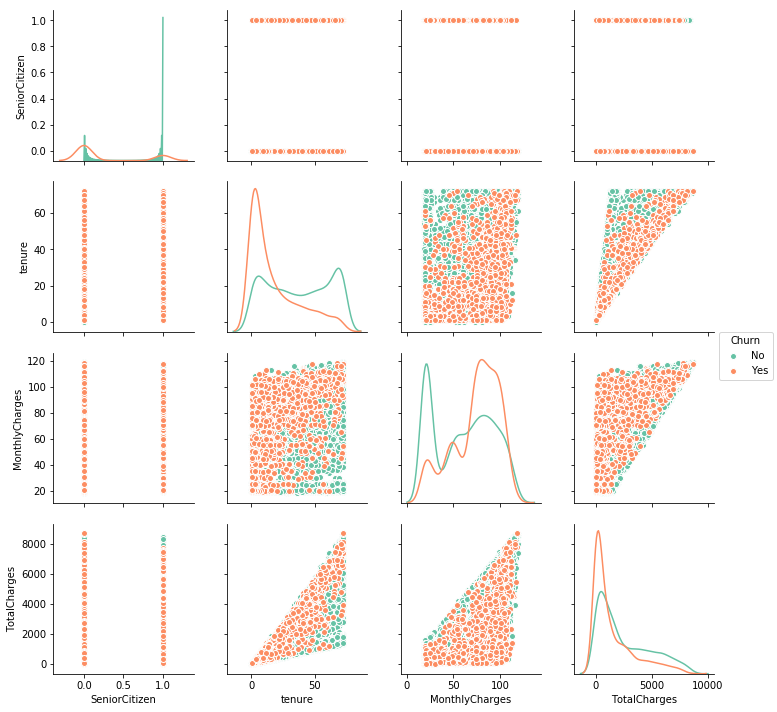

In [34]:
sns.pairplot(data,hue = 'Churn',palette = 'Set2',diag_kind='kde')

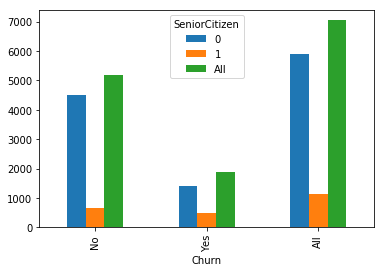

In [35]:
pd.crosstab(data.Churn,data.SeniorCitizen,margins = True).plot(kind = 'bar')

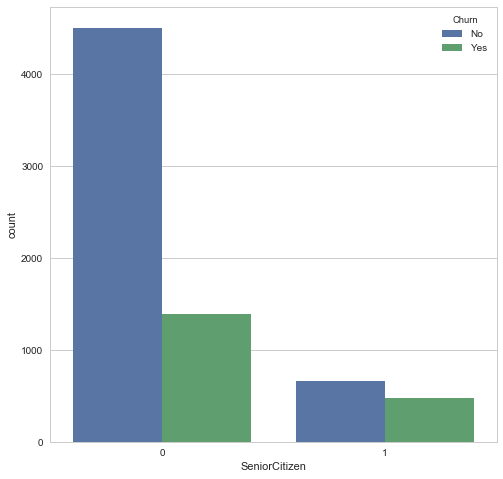

In [36]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.countplot(data.SeniorCitizen,hue = data.Churn);

Senior citizens are less likely to churn is what seems from the data so far

In [37]:
data.SeniorCitizen.value_counts(normalize = True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

Now let's see how gender affects the churn value of the customers

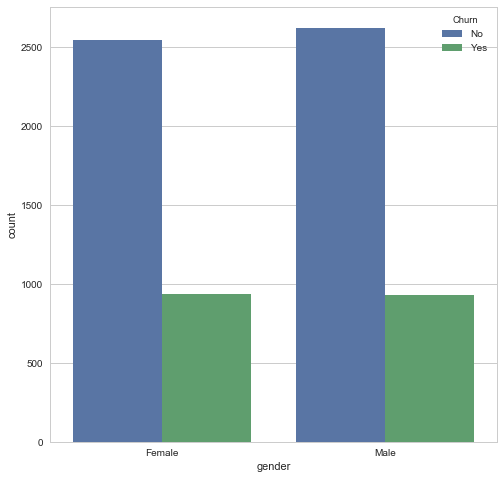

In [38]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.countplot(data.gender,hue = data.Churn);

Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043


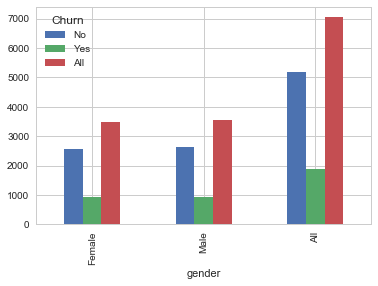

In [39]:
pd.crosstab(data.gender,data.Churn,margins=True).plot(kind = 'bar')
print(pd.crosstab(data.gender,data.Churn,margins=True))

In [40]:
print('percentage of males who have left the company equals {0}'.format((930/1869)*100))
print('percentage of females who have left the company equals {0}'.format((939/1869)*100))

percentage of males who have left the company equals 49.75922953451043
percentage of females who have left the company equals 50.24077046548957


Now let's see how the other factors such as Streaming TV are affecting the churn rate

Churn                  No   Yes   All
StreamingTV                          
No                   1868   942  2810
No internet service  1413   113  1526
Yes                  1893   814  2707
All                  5174  1869  7043


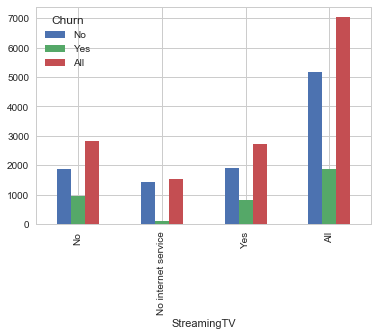

In [41]:
pd.crosstab(data.StreamingTV,data.Churn,margins=True).plot(kind = 'bar')
print(pd.crosstab(data.StreamingTV,data.Churn,margins=True))

Churn,No,Yes,All
OnlineSecurity,,,
No,2037,1461,3498
No internet service,1413,113,1526
Yes,1724,295,2019
All,5174,1869,7043


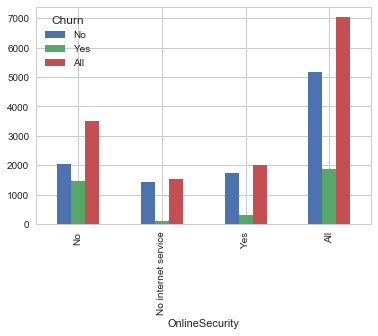

In [42]:
pd.crosstab(data.OnlineSecurity,data.Churn,margins=True).plot(kind = 'bar');
pd.crosstab(data.OnlineSecurity,data.Churn,margins = True)

From this we can see the churn of customers has increased where they don't have online security involved in their plan.This cn be a factor why the people have opted out from the services of the comapny.

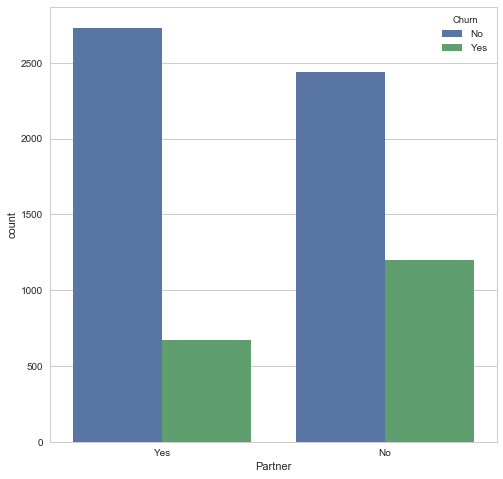

In [43]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.countplot(data.Partner, hue = data.Churn)

Customers who have partners or spouses are more likely to churn out.

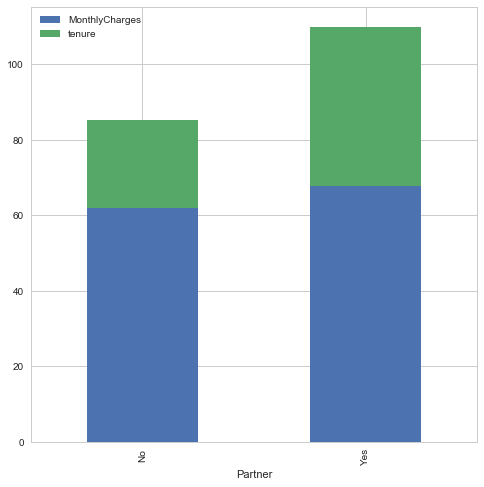

In [44]:
data.groupby('Partner')[ 'MonthlyCharges', 'tenure'].mean().plot(kind = 'bar', stacked = True,figsize = (8,8));

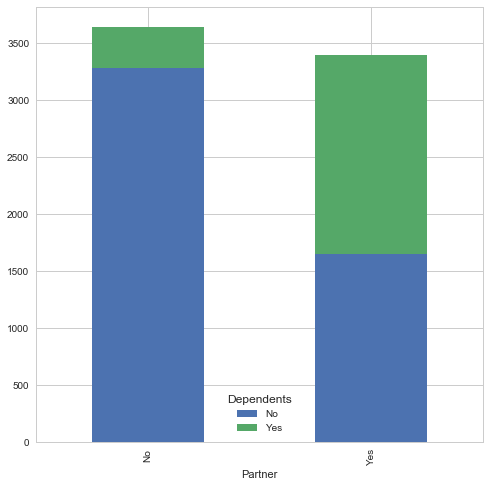

In [45]:
pd.crosstab(data.Partner,data.Dependents).plot(kind = 'bar',stacked = True,figsize = (8,8));

Now let's see whether the variable contacts has some effects on churn.

In [46]:
data.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

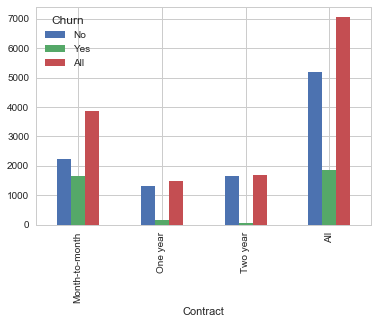

In [47]:
pd.crosstab(data.Contract,data.Churn,margins=True).plot(kind = 'bar');

We see here that customers having a Month-to-Month contract are more likely to have churned than that of those who had a One or Two year contract.

In [48]:
pd.crosstab(data.Contract,data.Churn,margins=True,normalize = True)

Churn,No,Yes,All
Contract,,,
Month-to-month,0.315207,0.234985,0.550192
One year,0.185574,0.023570,0.209144
Two year,0.233849,0.006815,0.240664
All,0.734630,0.265370,1.000000


The percentage of people that had a month-to-month contract basis make up for more 90% of the customers who have churned

In [49]:
data.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Let's check whether the mode of payment has any possible effect on the customer churn pattern

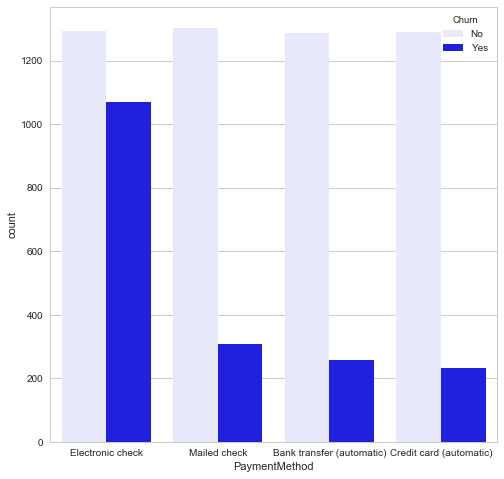

In [50]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.countplot(data.PaymentMethod, hue = data.Churn,color='blue'); 

From the above chart we can clearly see that customers who had to pay through Electronic check mode of payment had more percentage to have churned

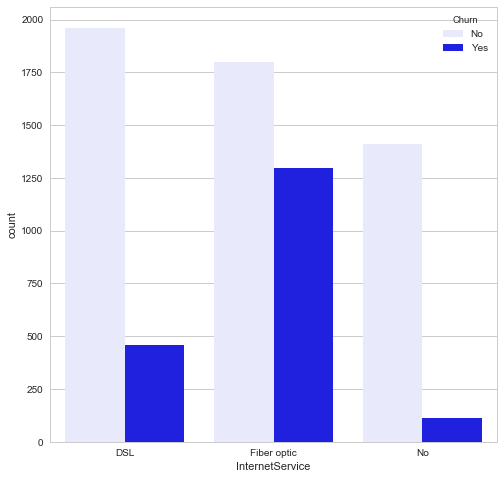

In [51]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.countplot(data.InternetService, hue = data.Churn,color = 'blue');

An interesting observation here is that customers who had Fiber optic as mode of Internet Service had opted to withdraw from the company services. So most probably company has to resolve some issues regarding its Fiber optic mode of service.

In [52]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [53]:
data['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

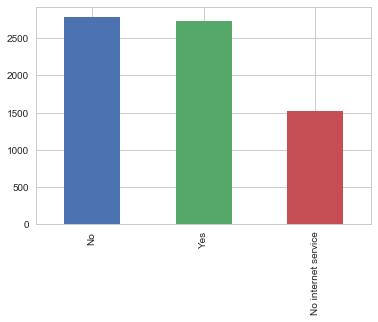

In [54]:
data.StreamingMovies.value_counts().plot(kind = 'bar');

Let's stack it up with churn values and observe the inferences

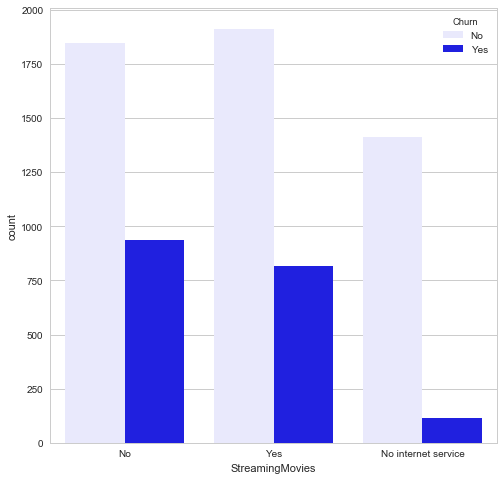

In [55]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.countplot(data.StreamingMovies, hue = data.Churn,color = 'blue');

In [56]:
data.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [58]:
data.loc[(data.Churn == 'Yes'),'MonthlyCharges'].median()

79.65

In [59]:
data.loc[(data.Churn == 'Yes'),'PaymentMethod'].value_counts(normalize = True)

Electronic check             0.573034
Mailed check                 0.164794
Bank transfer (automatic)    0.138042
Credit card (automatic)      0.124131
Name: PaymentMethod, dtype: float64

In [60]:
data= pd.get_dummies(data,columns=['Partner','Dependents',
       'PhoneService', 'MultipleLines','StreamingTV',
       'StreamingMovies','Contract','PaperlessBilling','InternetService'],drop_first=True)

Now let's convert our churn values from Yes and NO to 0 and 1

In [61]:
data = pd.get_dummies(data,columns=['Churn'],drop_first=True)

In [62]:
data

,gender,SeniorCitizen,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaymentMethod,MonthlyCharges,TotalCharges,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,1,No,Yes,No,No,Electronic check,29.85,29.85,...,0,0,0,0,0,0,1,0,0,0
5575-GNVDE,Male,0,34,Yes,No,Yes,No,Mailed check,56.95,1889.50,...,0,0,0,0,1,0,0,0,0,0
3668-QPYBK,Male,0,2,Yes,Yes,No,No,Mailed check,53.85,108.15,...,0,0,0,0,0,0,1,0,0,1
7795-CFOCW,Male,0,45,Yes,No,Yes,Yes,Bank transfer (automatic),42.30,1840.75,...,0,0,0,0,1,0,0,0,0,0
9237-HQITU,Female,0,2,No,No,No,No,Electronic check,70.70,151.65,...,0,0,0,0,0,0,1,1,0,1
9305-CDSKC,Female,0,8,No,No,Yes,No,Electronic check,99.65,820.50,...,0,1,0,1,0,0,1,1,0,1
1452-KIOVK,Male,0,22,No,Yes,No,No,Credit card (automatic),89.10,1949.40,...,0,1,0,0,0,0,1,1,0,0
6713-OKOMC,Female,0,10,Yes,No,No,No,Mailed check,29.75,301.90,...,0,0,0,0,0,0,0,0,0,0
7892-POOKP,Female,0,28,No,No,Yes,Yes,Electronic check,104.80,3046.05,...,0,1,0,1,0,0,1,1,0,1


Now let's try out our first model on the dataset

In [63]:
data.drop(['gender','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','PaymentMethod'],axis=1,inplace = True)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
SeniorCitizen                          7043 non-null object
tenure                                 7043 non-null int64
MonthlyCharges                         7043 non-null float64
TotalCharges                           7043 non-null float64
Partner_Yes                            7043 non-null uint8
Dependents_Yes                         7043 non-null uint8
PhoneService_Yes                       7043 non-null uint8
MultipleLines_No phone service         7043 non-null uint8
MultipleLines_Yes                      7043 non-null uint8
StreamingTV_No internet service        7043 non-null uint8
StreamingTV_Yes                        7043 non-null uint8
StreamingMovies_No internet service    7043 non-null uint8
StreamingMovies_Yes                    7043 non-null uint8
Contract_One year                      7043 non-null uint8
Contract_Two year                      7043 non-null

In [65]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5575-GNVDE,0,34,56.95,1889.50,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3668-QPYBK,0,2,53.85,108.15,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
7795-CFOCW,0,45,42.30,1840.75,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
9237-HQITU,0,2,70.70,151.65,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1


In [66]:
X = data.drop('Churn_Yes',axis=1).as_matrix().astype('float')
Y = data.Churn_Yes.ravel()

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)

In [68]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(4930, 18) (2113, 18) (4930,) (2113,)


First let's try out the logistic regression model on our dataset to see how it performs 

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [70]:
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,average_precision_score

In [72]:
preds = lr.predict(X_test)

In [73]:
print(accuracy_score(Y_test,preds))

0.8078561287269286


In [74]:
print(classification_report(Y_test,preds))

             precision    recall  f1-score   support

          0       0.85      0.90      0.87      1560
          1       0.66      0.55      0.60       553

avg / total       0.80      0.81      0.80      2113



In [75]:
print(average_precision_score(Y_test,preds))

0.4796765464223596


Now let's try SVM for our dataset

In [76]:
from sklearn import svm
sv = svm.SVC()

In [77]:
sv.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
preds_svm = sv.predict(X_test)

In [79]:
print(accuracy_score(Y_test,preds_svm))

0.7690487458589683


In [80]:
print(classification_report(Y_test,preds_svm))

             precision    recall  f1-score   support

          0       0.78      0.96      0.86      1560
          1       0.67      0.23      0.34       553

avg / total       0.75      0.77      0.72      2113



Finally let's try XGBoost 

In [81]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [82]:
preds_xgb = classifier.predict(X_test)

C:\Users\Tutun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [83]:
print(accuracy_score(Y_test,preds_xgb))

0.791292001893043
